## UK Gender Pay Gap

### Description:
Employers with 250 or more employees in UK had to publish and report specific figures about their gender pay gap. The gender pay gap is the difference between the average earnings of men and women, expressed relative to men’s earnings. For example, ‘women earn 15% less than men per hour’. 

**Problem with notebook for windows to see the actual graphs for the last 3 box and whisker plots please view the output file :)**

**Works perfecting fine for MacOS and Linux Machines, run notebook as normal**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# UK paygap data
gap = pd.read_csv('data/UK Gender Pay Gap Data.csv')

In [89]:
# SIC codes data
co_data = pd.read_csv('data/all_uk_data.zip',compression='zip', nrows=150000,low_memory=False) 
###fix line, remove parameter of nrows if you are using any but windows.

In [90]:
gap.sample(5)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline
9617,UNIVERSITY OF SHEFFIELD,"The University of Sheffield,\r\nWestern Bank,\...",NaN,"1,\r\n85421",19.0,11.1,68.6,40.0,16.2,20.3,...,57.5,52.6,47.4,58.7,41.3,https://www.sheffield.ac.uk/hr/equality/gpg,NaN,"5000 to 19,999",UNIVERSITY OF SHEFFIELD,False
3836,H F ELECTRICAL LIMITED,"100 Albert Drive,\r\nGlasgow,\r\nUnited Kingdo...",SC073414,43210,-25.1,31.8,34.0,48.9,13.6,27.5,...,27.7,100.0,0.0,84.6,15.4,http://www.hf-group.co.uk/downloads/,Jill Nicolson (Finance Director),250 to 499,H F ELECTRICAL LIMITED,False
6092,NCO EUROPE LIMITED,"New City House,\r\n57-63 Ringway,\r\nPreston,\...",03122581,82200,8.2,0.0,18.2,12.0,63.0,66.3,...,47.9,48.3,51.7,54.8,45.2,NaN,Nick Ford (Managing Director),500 to 999,NCO EUROPE LIMITED,False
2031,CNA SERVICES (UK) LIMITED,"20 Fenchurch Street,\r\nLondon,\r\nUnited King...",08836589,82990,34.1,34.3,62.5,56.9,88.8,90.4,...,44.8,69.0,31.0,75.9,24.1,http://www.cnahardy.com/,Phillip Hamer (General Counsel),250 to 499,CNA SERVICES (UK) LIMITED,False
2919,Enable Scotland (Leading The Way),"Inspire House 3 Renshaw Place,\r\nEurocentral,...",SC145263,88990,-2.6,0.0,0.0,0.0,0.0,0.0,...,72.5,27.2,72.8,22.8,77.2,NaN,Theresa Shearer (Chief Executive Officer),1000 to 4999,Enable Scotland (Leading The Way),False


In [91]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332 entries, 0 to 10331
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10332 non-null  object 
 1   Address                    10332 non-null  object 
 2   CompanyNumber              8993 non-null   object 
 3   SicCodes                   9763 non-null   object 
 4   DiffMeanHourlyPercent      10332 non-null  float64
 5   DiffMedianHourlyPercent    10332 non-null  float64
 6   DiffMeanBonusPercent       10332 non-null  float64
 7   DiffMedianBonusPercent     10332 non-null  float64
 8   MaleBonusPercent           10332 non-null  float64
 9   FemaleBonusPercent         10332 non-null  float64
 10  MaleLowerQuartile          10332 non-null  float64
 11  FemaleLowerQuartile        10332 non-null  float64
 12  MaleLowerMiddleQuartile    10332 non-null  float64
 13  FemaleLowerMiddleQuartile  10332 non-null  flo

In [92]:
co_data.sample(5)

,Unnamed: 0,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4
118463,118463,ACCESSIUM LTD,10485796,NaN,NaN,42 NEWTON DRIVE,NaN,DURHAM,NaN,ENGLAND,DH1 5BE,Private Limited Company,Active,United Kingdom,0,62012 - Business and domestic software develop...,NaN,NaN,NaN
122857,122857,ACE MINIBUS ESSEX LTD,11006932,NaN,NaN,21 NORTH COUR,SUMMER FIELDS,INGATESTONE,ESSEX,UNITED KINGDOM,CM4 0BD,Private Limited Company,Active,United Kingdom,0,49390 - Other passenger land transport,NaN,NaN,NaN
6146,6146,11 STANLEY GARDENS RESIDENTS ASSOCIATION LIMITED,01222247,NaN,NaN,11 STANLEY GARDENS,LONDON,NaN,NaN,NaN,W11 2ND,Private Limited Company,Active,United Kingdom,0,98000 - Residents property management,NaN,NaN,NaN
118523,118523,ACCESSORIGHT PRIVATE LIMITED,10977366,NaN,NaN,KEMP HOUSE,160 CITY ROAD,LONDON,NaN,UNITED KINGDOM,EC1V 2NX,Private Limited Company,Active,United Kingdom,0,47910 - Retail sale via mail order houses or v...,NaN,NaN,NaN
125449,125449,ACJ SERVICES LIMITED,06548326,NaN,NaN,TWITCHEN ODIHAM ROAD,RISELEY,READING,NaN,NaN,RG7 1SD,Private Limited Company,Active,United Kingdom,0,62090 - Other information technology service a...,NaN,NaN,NaN


In [93]:
co_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unnamed: 0                  150000 non-null  int64 
 1   CompanyName                 150000 non-null  object
 2    CompanyNumber              150000 non-null  object
 3   RegAddress.CareOf           5852 non-null    object
 4   RegAddress.POBox            305 non-null     object
 5   RegAddress.AddressLine1     149466 non-null  object
 6    RegAddress.AddressLine2    97612 non-null   object
 7   RegAddress.PostTown         144849 non-null  object
 8   RegAddress.County           62015 non-null   object
 9   RegAddress.Country          72327 non-null   object
 10  RegAddress.PostCode         148725 non-null  object
 11  CompanyCategory             150000 non-null  object
 12  CompanyStatus               150000 non-null  object
 13  CountryOfOrigin             1

In [49]:
# Remove spaces from beginning of column names of co_data df

co_data.columns = [c.replace(' ', '_') for c in co_data.columns]

co_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unnamed:_0                  150000 non-null  int64 
 1   CompanyName                 150000 non-null  object
 2   _CompanyNumber              150000 non-null  object
 3   RegAddress.CareOf           5852 non-null    object
 4   RegAddress.POBox            305 non-null     object
 5   RegAddress.AddressLine1     149466 non-null  object
 6   _RegAddress.AddressLine2    97612 non-null   object
 7   RegAddress.PostTown         144849 non-null  object
 8   RegAddress.County           62015 non-null   object
 9   RegAddress.Country          72327 non-null   object
 10  RegAddress.PostCode         148725 non-null  object
 11  CompanyCategory             150000 non-null  object
 12  CompanyStatus               150000 non-null  object
 13  CountryOfOrigin             1

In [50]:
# Rename the column CompanyNumber

co_data.rename(columns={'_CompanyNumber': 'CompanyNumber'}, inplace=True)


In [51]:
# Join the two df's on CompanyNumber

gap_all = pd.merge(gap, co_data, how='left', on='CompanyNumber')

In [52]:
# Confirm the length of the the joined dataset

len(gap_all)

10332

In [53]:
gap_all.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,Mortgages.NumMortSatisfied,SICCode.SicText_1,SICCode.SicText_2,SICCode.SicText_3,SICCode.SicText_4
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,NaN,DT11 0PX,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,United Kingdom,2.0,85310 - General secondary education,NaN,NaN,NaN
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19, Smith's Place,\r\nLeith Walk,\r\nEdinburgh...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,NaN,EH6 8NU,Private Limited Company,Active,United Kingdom,11.0,47730 - Dispensing chemist in specialised stores,NaN,NaN,NaN
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,NaN,CF10 5BF,Private Limited Company,Active,United Kingdom,9.0,61900 - Other telecommunications activities,NaN,NaN,NaN
3,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,NaN,TA2 8LG,"PRI/LTD BY GUAR/NSC (Private, limited by guara...",Active,United Kingdom,0.0,93110 - Operation of sports facilities,NaN,NaN,NaN
4,1879 EVENTS MANAGEMENT LIMITED,"The Sunderland Stadium Of Light,,\r\nSunderlan...",07743495,"56210,\r\n70229",13.4,8.1,41.4,43.7,8.7,3.2,...,NaN,SR5 1SU,Private Limited Company,Active,United Kingdom,0.0,56210 - Event catering activities,70229 - Management consultancy activities othe...,NaN,NaN


In [54]:
gap_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10332 entries, 0 to 10331
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmployerName                10332 non-null  object 
 1   Address                     10332 non-null  object 
 2   CompanyNumber               8993 non-null   object 
 3   SicCodes                    9763 non-null   object 
 4   DiffMeanHourlyPercent       10332 non-null  float64
 5   DiffMedianHourlyPercent     10332 non-null  float64
 6   DiffMeanBonusPercent        10332 non-null  float64
 7   DiffMedianBonusPercent      10332 non-null  float64
 8   MaleBonusPercent            10332 non-null  float64
 9   FemaleBonusPercent          10332 non-null  float64
 10  MaleLowerQuartile           10332 non-null  float64
 11  FemaleLowerQuartile         10332 non-null  float64
 12  MaleLowerMiddleQuartile     10332 non-null  float64
 13  FemaleLowerMiddleQuartile   103

In [55]:
# Coloumn required

gap_col = ['EmployerName', 'DiffMedianHourlyPercent', 'DiffMedianBonusPercent', 
      'MaleBonusPercent', 'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleTopQuartile', 
      'FemaleTopQuartile', 'CompanyLinkToGPGInfo', 'EmployerSize', 'RegAddress.PostTown', 'CompanyCategory',
           'SICCode.SicText_1'] 


gap_all = gap_all[gap_col]


In [56]:
gap_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10332 entries, 0 to 10331
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployerName             10332 non-null  object 
 1   DiffMedianHourlyPercent  10332 non-null  float64
 2   DiffMedianBonusPercent   10332 non-null  float64
 3   MaleBonusPercent         10332 non-null  float64
 4   FemaleBonusPercent       10332 non-null  float64
 5   MaleLowerQuartile        10332 non-null  float64
 6   FemaleLowerQuartile      10332 non-null  float64
 7   MaleTopQuartile          10332 non-null  float64
 8   FemaleTopQuartile        10332 non-null  float64
 9   CompanyLinkToGPGInfo     7651 non-null   object 
 10  EmployerSize             10332 non-null  object 
 11  RegAddress.PostTown      174 non-null    object 
 12  CompanyCategory          183 non-null    object 
 13  SICCode.SicText_1        183 non-null    object 
dtypes: float64(8), object(

In [57]:
gap_all.describe()

,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile
count,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000
mean,11.864160,-20.189111,35.607472,34.127216,46.393796,53.606204,60.833856,39.166144
std,15.714352,1413.543525,36.353912,36.068136,24.125626,24.125626,24.375394,24.375394
min,-164.000000,-120695.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.000000,0.900000,0.375000,27.000000,35.600000,41.600000,17.175000
50%,9.400000,5.300000,20.000000,17.800000,44.400000,55.600000,62.700000,37.300000
75%,21.000000,38.000000,73.400000,70.400000,64.400000,73.000000,82.825000,58.400000
max,121.200000,5566.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


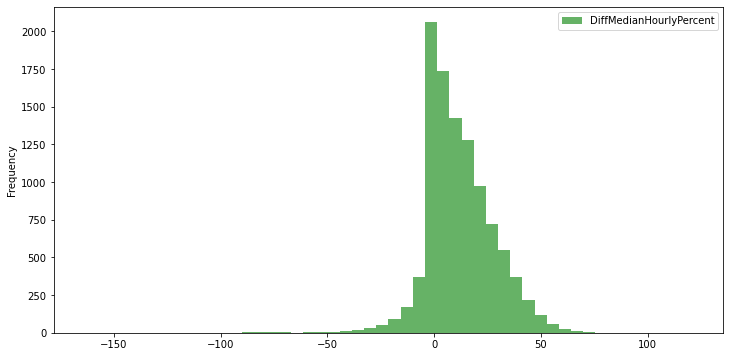

In [58]:
gap_all['DiffMedianHourlyPercent'].plot(kind='hist', bins=50, figsize=[12,6], alpha=.6, legend=True, color = 'green')

Looking at this histogram, we observe that the distribution of the "DiffMedianHourlyPercent" is severely-skewed to the left. This means that in most the cases men have higher hourly payment compared to women

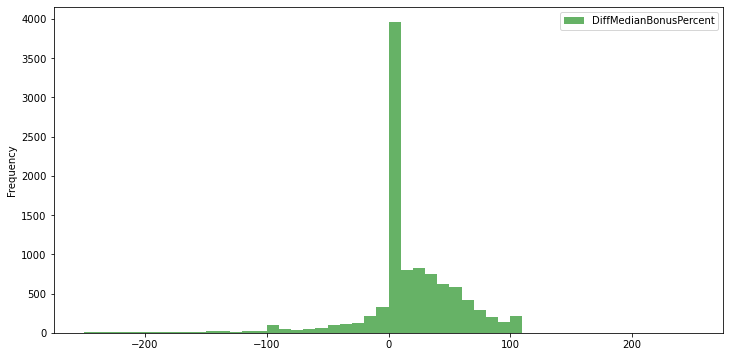

In [97]:
gap_all['DiffMedianBonusPercent'].plot(kind='hist', bins=50, figsize=[12,6], alpha=.6, legend=True, color = 'green',
                                       range=(-250,250)) #setting up a range to ignore ourliers

Looking at this histogram, we can observe that the distribution of the "DiffMedianBonusPercent" is severely-skewed to the left. This means that in most the cases men are getting higher bonuses compared to women.

Interestingly enough, there are quite a few (valid) outliers on both sides of the spectrum.

In [60]:
# 10 Companies with highest paygap in hourly payment favouring men
    
gap_all.nlargest(10, 'DiffMedianHourlyPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1
7868,Shrewsbury Academies Trust,121.2,0.0,0.0,0.0,6.1,93.9,25.8,74.2,http://sat.coop,250 to 499,NaN,NaN,NaN
1160,BOUX AVENUE LIMITED,75.7,-100.0,0.0,81.0,0.0,100.0,9.0,91.0,http://www.bouxavenue.com,500 to 999,NaN,NaN,NaN
3449,FUSION PEOPLE LIMITED,73.3,89.0,19.0,15.0,49.6,50.4,82.2,17.8,https://fusionpeople.com/io/Gender-Pay-Gap-Rep...,500 to 999,NaN,NaN,NaN
5481,MALLING HEALTH (UK) LIMITED,73.0,33.3,2.7,0.4,14.3,85.7,32.9,67.1,NaN,250 to 499,NaN,NaN,NaN
7522,Ryanair ltd,71.8,3.4,27.8,82.8,43.0,57.0,97.0,3.0,https://investor.ryanair.com/wp-content/upload...,1000 to 4999,NaN,NaN,NaN
2117,CONNELLS SURVEY & VALUATION LIMITED,71.0,86.0,94.0,56.0,17.0,83.0,86.0,14.0,NaN,250 to 499,NaN,NaN,NaN
10140,WIPAC LIMITED,68.5,18.4,9.3,2.8,61.6,38.4,93.1,6.9,http://www.wipac.com/,250 to 499,NaN,NaN,NaN
4925,Kirkland & Ellis International LLP,68.2,74.3,77.4,77.9,34.4,65.6,62.3,37.7,https://www.kirkland.com/sitecontent.cfm?conte...,250 to 499,NaN,NaN,NaN
8484,SWEATY BETTY LIMITED,68.1,72.5,75.0,85.0,0.0,100.0,4.0,96.0,http://www.sweatybetty.com/images/articles/swe...,500 to 999,NaN,NaN,NaN
2764,EAST LIFESTYLE LIMITED,67.5,-28.9,28.6,7.5,1.5,98.5,14.7,85.3,NaN,250 to 499,NaN,NaN,NaN


In [61]:
# 10 Companies with highest paygap in hourly payment favouring women
    
gap_all.nsmallest(10, 'DiffMedianHourlyPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1
4390,INBRELLA LIMITED,-164.0,0.0,0.0,0.0,96.1,3.9,74.1,25.9,NaN,250 to 499,NaN,NaN,NaN
7136,RANDSTAD HR SOLUTIONS LIMITED,-103.6,-2.0,2.9,1.2,16.3,83.7,31.1,68.9,https://www.randstad.co.uk/about-us/about-rand...,1000 to 4999,NaN,NaN,NaN
6861,PLUS PAYROLL SERVICES LIMITED,-100.1,0.0,0.0,0.0,96.7,3.3,30.9,69.1,NaN,500 to 999,NaN,NaN,NaN
2282,CREST PLUS OPERATIONS LIMITED,-85.2,0.0,0.0,0.0,97.0,3.0,81.2,18.8,https://www.crestplus.com/pay-gap-report.pdf,1000 to 4999,NaN,NaN,NaN
6417,NWN MEDIA LIMITED,-85.2,10.0,2.2,2.2,53.5,46.5,64.0,36.0,NaN,1000 to 4999,NaN,NaN,NaN
9841,WALLACE TRUST,-81.9,0.0,0.0,0.0,6.0,94.0,6.0,94.0,http://www.woodnewtontrust.com/,250 to 499,NaN,NaN,NaN
2683,Ducas Ltd,-81.3,0.0,0.0,0.0,82.1,17.9,26.8,73.2,NaN,250 to 499,NaN,NaN,NaN
10264,YELLOW DOT GROUP LIMITED,-80.6,-622.3,53.1,69.6,17.9,82.1,2.6,97.4,http://www.yellowdotnursery.co.uk/pdf/2017%20G...,250 to 499,NaN,NaN,NaN
10265,YELLOW DOT LIMITED,-80.6,-622.3,53.1,69.6,17.9,82.1,2.6,97.4,http://www.yellowdotnursery.co.uk/pdf/2017%20G...,Not Provided,NaN,NaN,NaN
4985,L.E.A.D SERVICES LIMITED,-77.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,https://www.leadacademytrust.co.uk/useruploads...,Less than 250,NaN,NaN,NaN


In [62]:
# 10 Companies with highest paygap in bonus payment favouring men
    
gap_all.nlargest(10, 'DiffMedianBonusPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1
9058,THE REED BOARDALL GROUP LIMITED,1.8,5566.7,2.9,4.3,86.8,13.2,88.4,11.6,http://www.reedboardall.com/wp-content/uploads...,500 to 999,NaN,NaN,NaN
1164,BOWDRAPER LIMITED,0.0,3848.2,0.7,0.5,25.0,75.0,24.0,76.0,https://bowdraper.co.uk,500 to 999,NaN,NaN,NaN
141,ACS RECRUITMENT SOLUTIONS LIMITED,0.0,3049.2,0.4,4.3,65.7,34.3,60.9,39.1,NaN,500 to 999,NORTHAMPTON,Private Limited Company,78109 - Other activities of employment placeme...
9531,UNIQUE CATERING AND MANAGEMENT SERVICES LIMITED,44.2,568.0,6.2,2.2,17.9,82.1,57.7,42.3,https://www.uniquecatering.co.uk/,250 to 499,NaN,NaN,NaN
6995,PRISM UK MEDICAL LIMITED,15.7,336.0,9.0,4.0,45.0,55.0,75.0,25.0,NaN,250 to 499,NaN,NaN,NaN
7373,ROBINSON MEDICAL RECRUITMENT LIMITED,0.0,324.0,1.0,1.0,0.0,100.0,23.0,77.0,NaN,500 to 999,NaN,NaN,NaN
1594,CARE BY US LTD,1.0,312.0,4.0,96.0,18.0,82.0,10.0,90.0,NaN,500 to 999,NaN,NaN,NaN
9402,TRIFORDS LIMITED,13.6,285.7,68.1,9.2,70.4,29.6,91.8,8.2,NaN,250 to 499,NaN,NaN,NaN
9666,VALE OF GLAMORGAN HOTEL LIMITED,9.3,281.0,26.0,48.0,40.8,59.2,60.0,40.0,https://www.valeresort.com/statutory-compliance/,250 to 499,NaN,NaN,NaN
3705,GP STRATEGIES LIMITED,58.8,272.2,49.3,44.2,22.5,77.5,68.8,31.2,https://www.gpstrategiesltd.com/about-us/gende...,500 to 999,NaN,NaN,NaN


In [63]:
# 10 Companies with highest paygap in bonus payment favouring women
    
gap_all.nsmallest(10, 'DiffMedianBonusPercent')

,EmployerName,DiffMedianHourlyPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,EmployerSize,RegAddress.PostTown,CompanyCategory,SICCode.SicText_1
6511,Optare Group Ltd,10.6,-120695.0,50.6,4.0,84.0,16.0,90.0,10.0,http://www.optare.com/,250 to 499,NaN,NaN,NaN
6664,PARSONS BAKERY LIMITED,9.0,-67400.0,0.0,19.0,8.0,92.0,27.0,73.0,NaN,250 to 499,NaN,NaN,NaN
6196,NHS Sheffield Clinical Commissioning Group,15.0,-31550.0,0.0,0.9,17.9,82.1,29.6,70.4,NaN,250 to 499,NaN,NaN,NaN
3896,Hallmark Cards PLC,32.5,-8408.0,41.7,12.9,13.3,86.7,34.8,65.2,http://www.hallmark.co.uk/about-us/,1000 to 4999,NaN,NaN,NaN
443,Anglia Restaurants Ltd,-1.7,-8267.4,1.7,0.7,43.1,56.9,52.6,47.4,http://www.angliarestaurants.co.uk/PAGES/about...,250 to 499,NaN,NaN,NaN
1291,BRITISH CERAMIC TILE LIMITED,-16.3,-6150.0,72.0,65.0,89.0,11.0,78.0,22.0,https://www.britishceramictile.com/about-us/ge...,250 to 499,NaN,NaN,NaN
6877,POLE TO WIN UK LIMITED,-0.7,-5985.0,1.2,0.5,56.4,43.6,51.6,48.4,NaN,500 to 999,NaN,NaN,NaN
1258,BRIGHTON MARINE PALACE & PIER COMPANY (THE),2.5,-5822.8,5.0,0.4,58.9,41.1,75.9,24.1,NaN,250 to 499,NaN,NaN,NaN
9977,WEST BROMWICH ALBION FOOTBALL CLUB LIMITED,34.3,-5233.3,45.3,22.1,51.5,48.5,84.2,15.8,https://www.wba.co.uk/news/2018/march/albion-r...,500 to 999,NaN,NaN,NaN
549,ARRIVA MIDLANDS LIMITED,8.0,-4900.0,3.0,3.0,90.0,10.0,83.0,17.0,http://www.arriva.co.uk/~/media/Files/A/Arriva...,500 to 999,NaN,NaN,NaN


Looking at the reports of some of those outliers at [https://gender-pay-gap.service.gov.uk/], the companies often attribute the difference in hourly payment and bonuses on the industry where they operate.

This is why we will also insert this parameter on the analysis.

In [96]:
# Explore the frequency of the various SIC codes

sic = gap_all['SICCode.SicText_1'].value_counts()
sic[sic > 50]

Series([], Name: SICCode.SicText_1, dtype: int64)

In [65]:
# Convert the categorical to ordinal variables, by choosing the mid-point of each range.

mapping = {
    'Less than 250': 125,
    '250 to 499': 350,
    '500 to 999': 750,
    '1000 to 4999': 3500,
    '5000 to 19,999': 12000,
    '20,000 or more': 35000,
    'Not Provided': np.nan
}

gap_all['EmployerSizeCenter'] = gap_all['EmployerSize'].map(mapping.get)

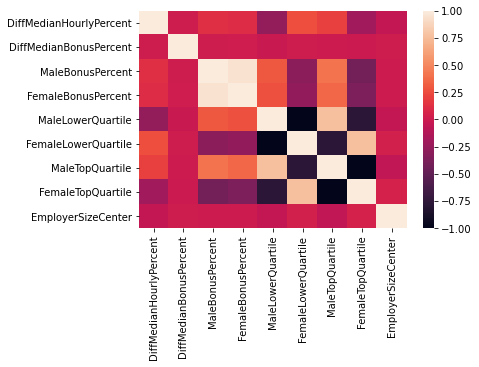

In [66]:
#Check for collinear variables

corr_matrix = gap_all.corr()
sns.heatmap(corr_matrix)

No sign of strong collinearirity among any of the potential predictors

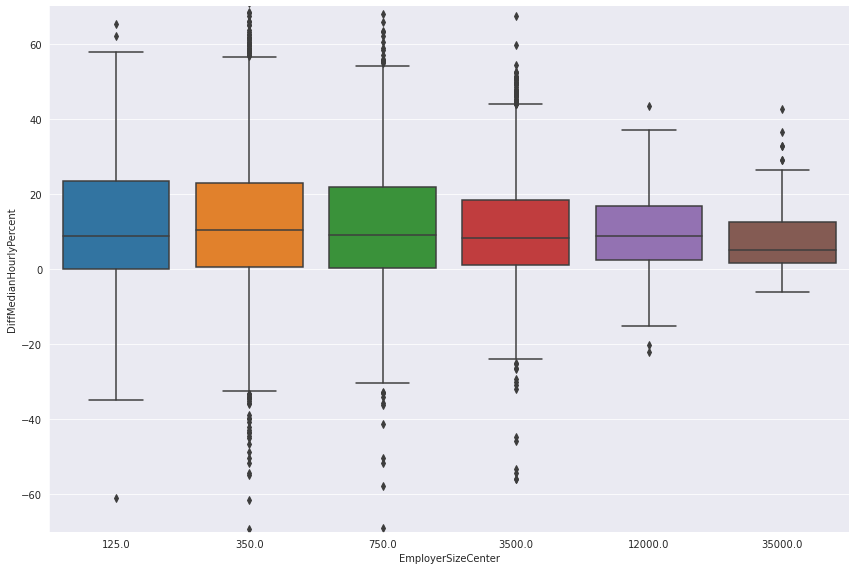

In [67]:
# Plot the DiffMedianHourlyPercent based on EmployerSizeCenter

with sns.axes_style("darkgrid"):
    ax = sns.catplot(kind='box', y='DiffMedianHourlyPercent', x='EmployerSizeCenter',
                   data=gap_all, height=8, aspect=1.5, legend_out=False)
    ax.set(ylim=(-70, 70))

**Observation:** Looking only on employer size, we can conclude that the paygap in hourly payment favouring men, is smaller in larger companies.

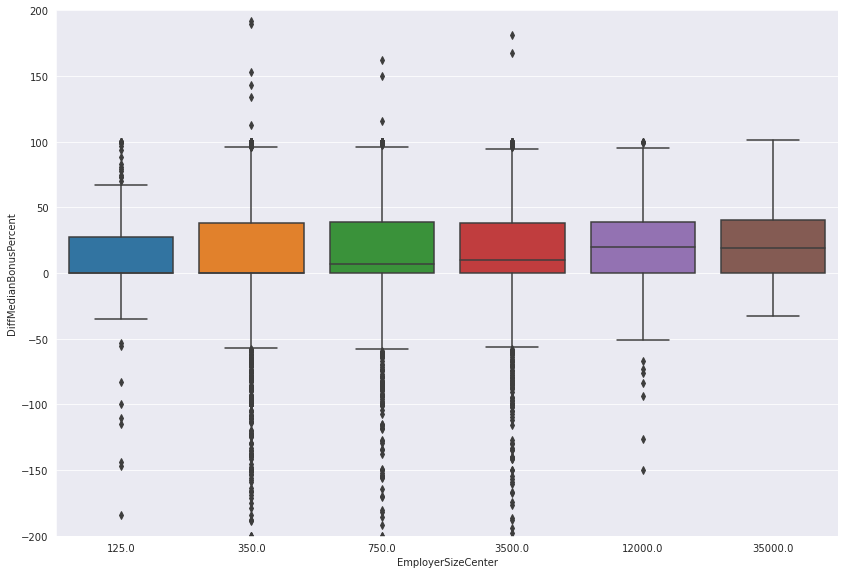

In [68]:
# Plot the DiffMedianBonusPercent based on EmployerSizeCenter

with sns.axes_style("darkgrid"):
    ax = sns.catplot(kind='box', y='DiffMedianBonusPercent', x='EmployerSizeCenter',
                   data=gap_all, height=8, aspect=1.5, legend_out=False)
    ax.set(ylim=(-200, 200))

**Observation:** On the other hand, the bigger companies tend to have higher disrepancies in bonus payments. Larger companies tend to give higher bonuses to men compared to women.

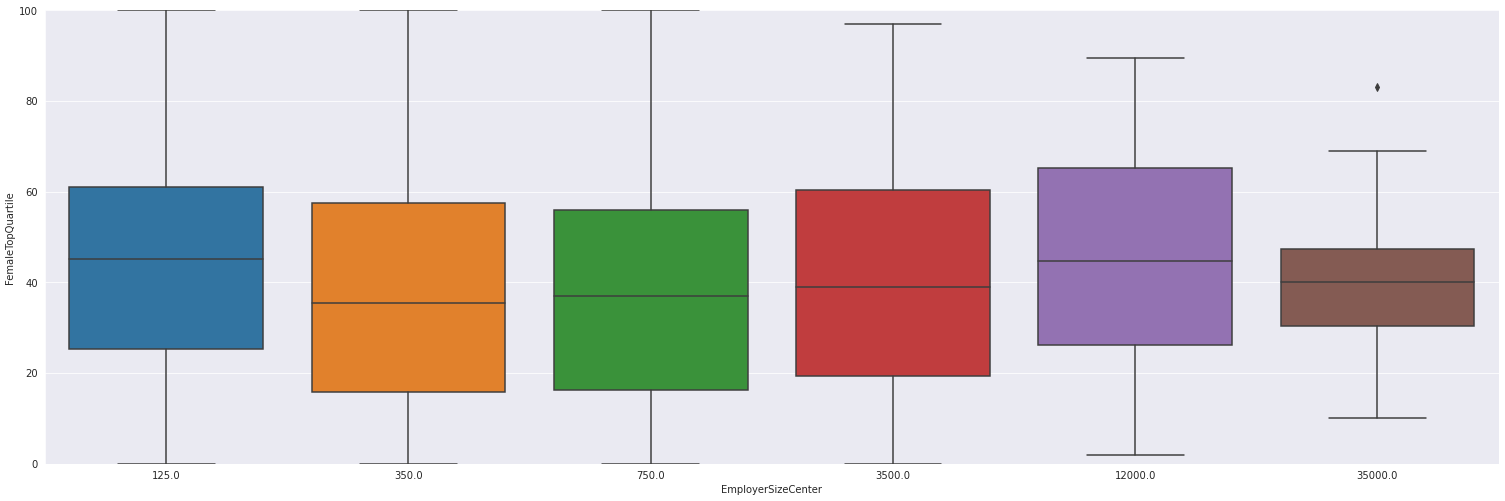

In [69]:
# Plot the FemaleTopQuartile based on EmployerSizeCenter

with sns.axes_style("darkgrid"):
    ax = sns.catplot(kind='box', y='FemaleTopQuartile', x='EmployerSizeCenter',
                   data=gap_all, height=7, aspect=3, legend_out=False)
    ax.set(ylim=(-0, 100))

**Observation:** Looking only on employer size, we can see that women are underepresented in the top quartlier, across employers of all sizes. However, it doesn't look like that there is a clear trend across employer sizes.

In [70]:
# See https://en.wikipedia.org/wiki/Standard_Industrial_Classification

mappings = [
    (100, 999, 'Agriculture'),
    (1000, 1499, 'Mining'),
    (1500, 1799, 'Construction'),
    (1800, 1999, 'not used'),
    (2000, 3999, 'Manufacturing'),
    (4000, 4999, 'Utility Services'),
    (5000, 5199, 'Wholesale Trade'),
    (5200, 5999, 'Retail Trade'),
    (6000, 6920, 'Financials'),
    (7000, 9004, 'Services'),
    (9100, 9729, 'Public Administration'),
    (9800, 9999, 'Nonclassifiable'),
]

errors = set()
def to_code_range(i):
    if type(i) != str:
        return np.nan
    if i == "None Supplied":
        return np.nan
    code = int(i[0:4])
    for code_from, code_to, name in mappings:
        if code >= code_from and code <= code_to:
            return name
    #print("ERROR", code)
    errors.add(code)
    return np.nan

gap_all['SIC_SECTOR'] = gap_all['SICCode.SicText_1'].map(to_code_range)

errors

set()

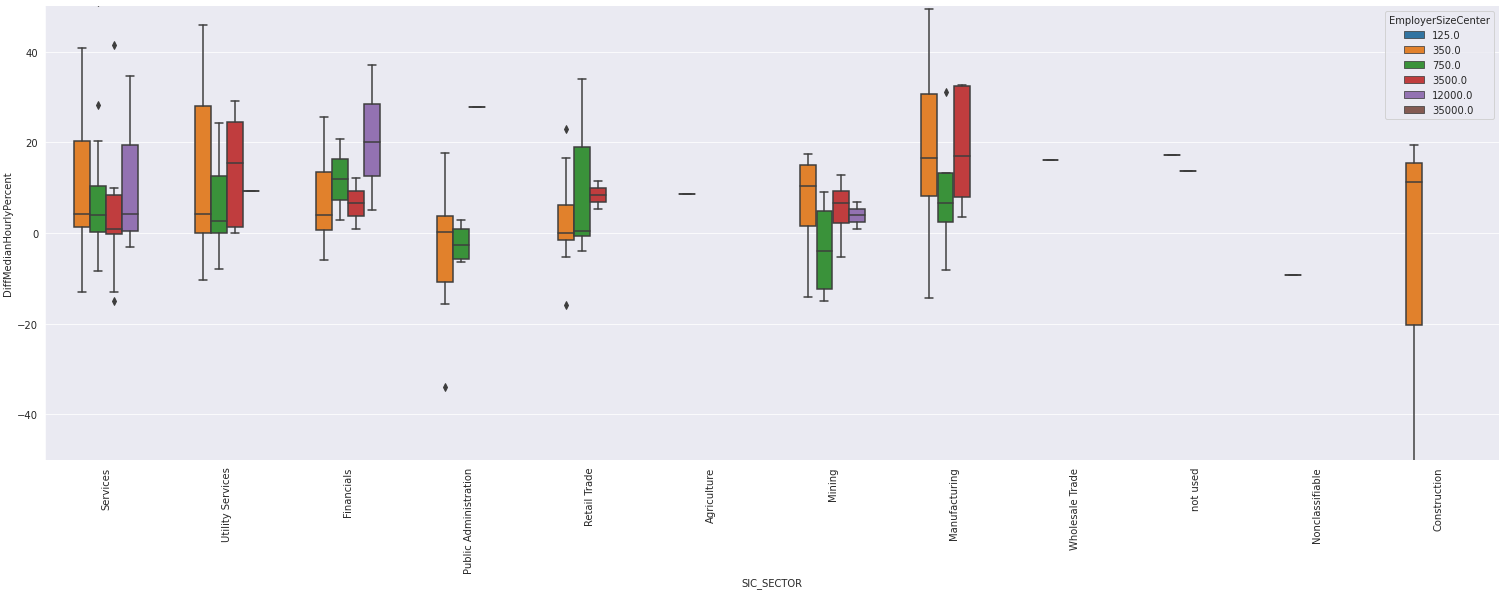

In [71]:
#create a factor plot for exploring whether the combination of size & industry affect the hourly paygap.

with sns.axes_style("darkgrid"):
    ax = sns.catplot(kind='box', y='DiffMedianHourlyPercent', hue='EmployerSizeCenter', x='SIC_SECTOR',
                   data=gap_all, height=7, aspect=3, legend_out=False) 
    ax.set(ylim=(-50, 50))
    ax.set_xticklabels(rotation=90)

**Observation:** Based on our previous observations, we would expect that bigger companies have always lower paygap compared with the rest. However, there are industries where this doesn't hold true. Services and Financial industry are examples of that. Similarly, the utilities insustry seems to have low paygap for smaller size companies.

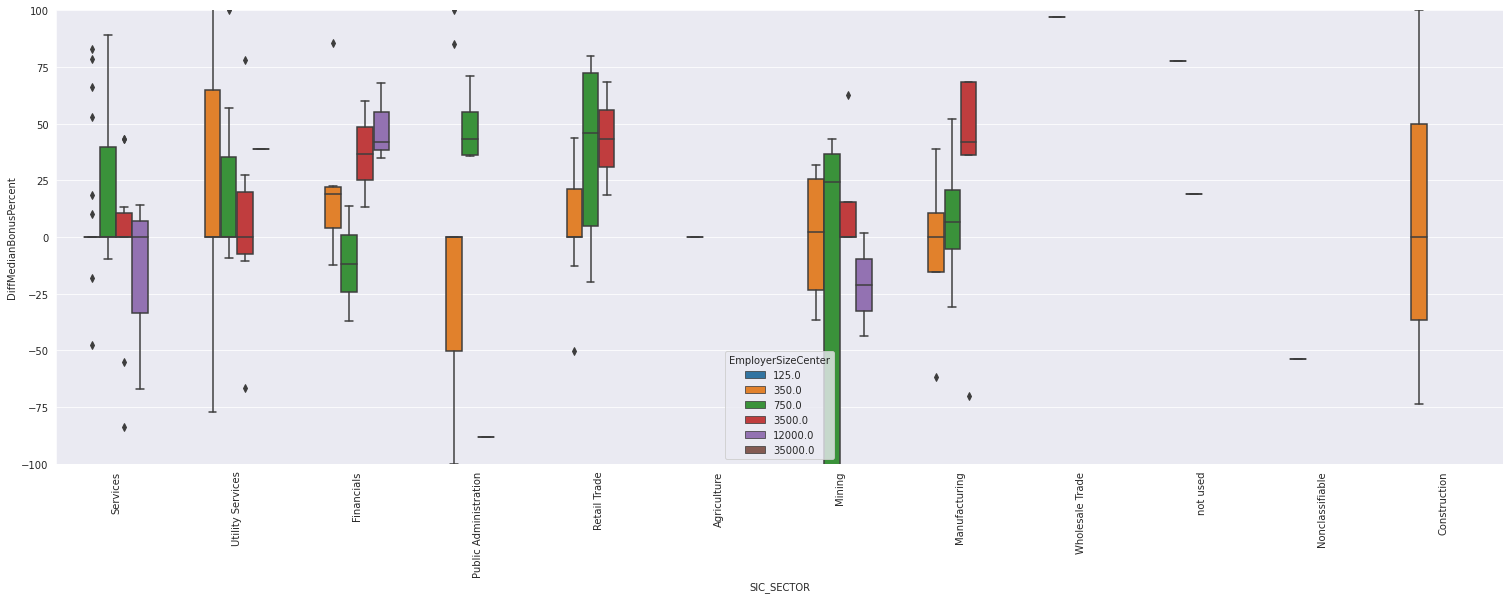

In [72]:
#create a factor plot for exploring whether the combination of size & industry affect the bonus payment.

with sns.axes_style("darkgrid"):
    ax = sns.catplot(kind='box', y='DiffMedianBonusPercent', hue='EmployerSizeCenter', x='SIC_SECTOR',
                   data=gap_all, height=7, aspect=3, legend_out=False) 
    ax.set(ylim=(-100, 100))
    ax.set_xticklabels(rotation=90)

**Observation:** Across all industries the men get higher bonuses compared to women. Large financial companies seem to have the higherst paygap in bonus payment. 

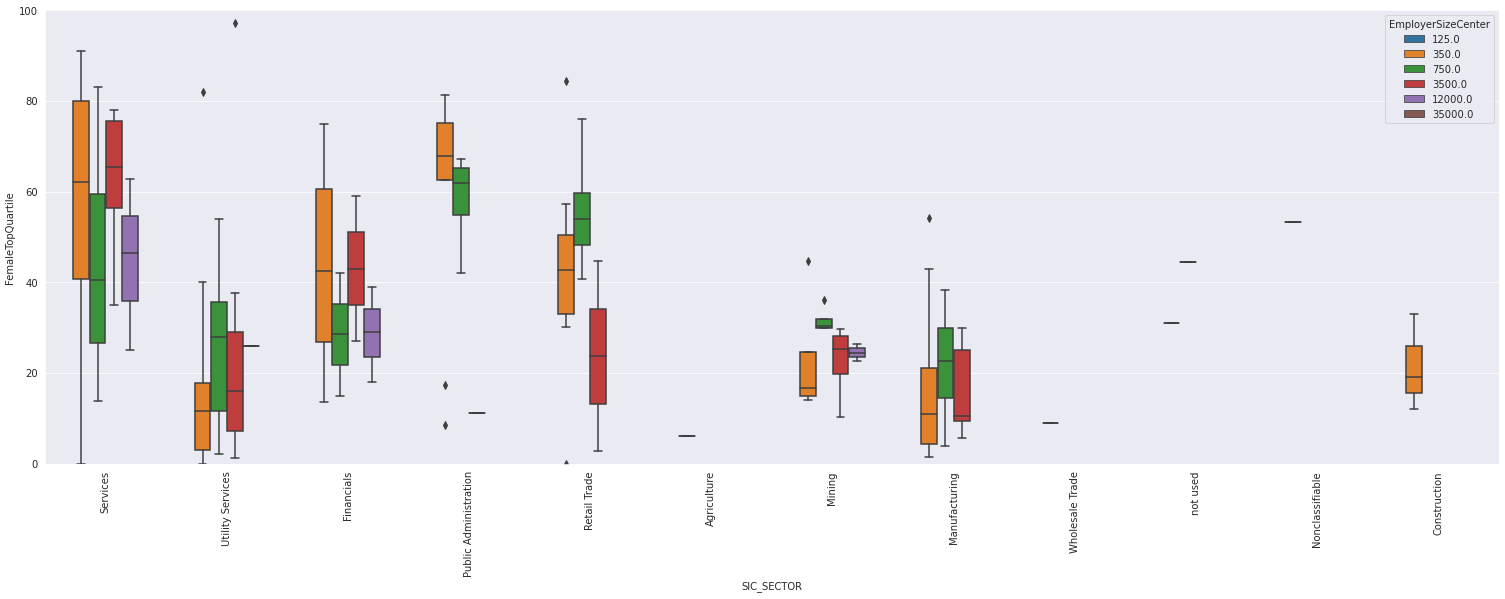

In [73]:
# Create a factor plot for exploring whether the combination of size & industry affect the female representation 
# in the top quartile.

with sns.axes_style("darkgrid"):
    ax = sns.catplot(kind='box', y='FemaleTopQuartile', hue='EmployerSizeCenter', x='SIC_SECTOR',
                   data=gap_all, height=7, aspect=3, legend_out=False) 
    ax.set(ylim=(0, 100))
    ax.set_xticklabels(rotation=90)

**Observation:** Based on our previous observations, it was expected that women will be underepresented in the top quartile across all industries.

**What we can do next** Build a model to predict the difference in hourly payment, based on the size and the industry of the company. 
-Examine linear regression & decision trees.